In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.advanced_activations import LeakyReLU

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/jeanlima/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [40]:
classifier = Sequential()
classifier.add(Convolution2D(16, kernel_size=(3, 3),activation='relu',input_shape=(64,64,3),padding='same'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D((2, 2),padding='same'))
classifier.add(Convolution2D(32, (3, 3), activation='relu',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Convolution2D(64, (3, 3), activation='relu',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))                  
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Convolution2D(128, (3, 3), activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(LeakyReLU(alpha=0.1))                  
classifier.add(Dense(15, activation='softmax'))

In [41]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
training_set = train_datagen.flow_from_directory(
        '../CreatingDeepLearningDataset/FrequencyDomain/Dataset-Train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '../CreatingDeepLearningDataset/FrequencyDomain/Dataset-Test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 2700 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [49]:
epochs = 15

history = classifier.fit_generator(
        training_set,
        steps_per_epoch=2700//32,
        epochs=epochs,
        validation_data=test_set,
        validation_steps=300//32,
        verbose = 1)

Epoch 1/15
 4/84 [>.............................] - ETA: 2:06 - loss: 0.7975 - acc: 0.5977

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1,  epochs+1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

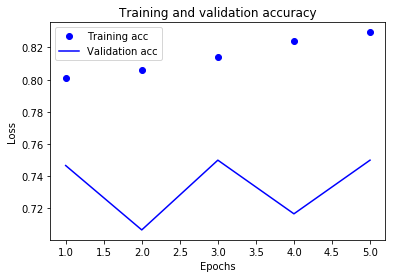

In [38]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
import pandas as pd
import numpy as np
predict_gen = test_datagen.flow_from_directory(directory='../CreatingDeepLearningDataset/FrequencyDomain/Dataset-Test',
                                                              target_size=[64,64],
                                                              batch_size=4123,
                                                              class_mode='categorical')

X_val_sample, res = next(predict_gen)
y_pred = classifier.predict(X_val_sample)
#classifier.evaluate_generator(test_datagen, steps=1, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
onedtrue = []
onedpred = []
for true, pred in zip(res, y_pred):
    onedtrue.append(np.argmax(true))
    onedpred.append(np.argmax(pred))
    
from sklearn.metrics import confusion_matrix
print(confusion_matrix(onedtrue, onedpred))

from sklearn.metrics import classification_report
target_names = ['Geladeira', 'Liquidificador', 'LiquidificadorGeladeira',
               'Notebook', 'NotebookGeladeira', 'NotebookLiquidificador',
               'NotebookLiquidificadorGeladeira', 'NotebookVentilador',
               'NotebookVentiladorGeladeira', 'NotebookVentiladorLiquidificador',
               'NotebookVentiladorLiquidificadorGeladeira', 'Ventilador',
               'VentiladorGeladeira', 'VentiladorLiquidificador',
               'VentiladorLiquidificadorGeladeira']

print(classification_report(onedtrue, onedpred, target_names=target_names))

Found 300 images belonging to 15 classes.
[[17  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0 15  2  0  0  1  0  0  0  0  0  0  0  2  0]
 [ 0  0 14  0  0  0  2  0  0  0  1  0  0  0  3]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0 11  3  3  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0 14  0  1  0  4  0  0  0  0]
 [ 0  0  0  1  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  1  3  0 10  2  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  2  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 19  0  0]
 [ 0  7  0  0  0  4  0  0  0  0  0  0  0  8  1]
 [ 0  0  6  0  0  0  0  0  0  0  4  0  0  0 10]]
                                           precision    recall  f1-score   support

                                Geladeira       0.94      0.85      0.89        20
                           Liquidificador       0.68      0.75      0.

In [35]:
classifier.save('freqdomain-76-basic.h5')